# Project Scope
Demonstration of various pandas, numpy, and seaborn functions using NYC Schools SAT data. The analysis in this project is not exhaustive, and is meant to showcase working proficiency of common tools for data analysis & visualization.

# 1.Housekeeping

Import libraries needed, read in file, and look at basic information.

In [187]:
#import common libraries, check directory
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%pwd

'C:\\Users\\si2320\\Downloads'

In [188]:
#import csv, peek at key info
df = pd.read_csv("nyc sat scores.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   School ID                    435 non-null    object 
 1   School Name                  435 non-null    object 
 2   Borough                      435 non-null    object 
 3   Building Code                435 non-null    object 
 4   Street Address               435 non-null    object 
 5   City                         435 non-null    object 
 6   State                        435 non-null    object 
 7   Zip Code                     435 non-null    int64  
 8   Latitude                     435 non-null    float64
 9   Longitude                    435 non-null    float64
 10  Phone Number                 435 non-null    object 
 11  Start Time                   431 non-null    object 
 12  End Time                     431 non-null    object 
 13  Student Enrollment  

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
0,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,Manhattan,NY,10001,40.75321,-73.99786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06M211,Inwood Early College for Health and Informatio...,Manhattan,M052,650 Academy Street,Manhattan,NY,10002,40.86605,-73.92486,...,3:00 PM,87.0,3.4%,21.8%,67.8%,4.6%,NaN,NaN,NaN,NaN
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,4:00 PM,1735.0,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0,91.0%
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,2:45 PM,358.0,11.7%,38.5%,41.3%,5.9%,395.0,411.0,387.0,78.9%
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:00 PM,383.0,3.1%,28.2%,56.9%,8.6%,418.0,428.0,415.0,65.1%


# 2. Data Cleaning & Tabular Analysis

While there are 435 schools, it looks like enrollment numbers are not available for all of them. In addition, it looks like SAT data is only available for 375 of them. Let's identify the schools that don't have any enrollment data.

In [170]:
#Identify schools where enrollment is not available
missing_enrollment = df[df['Student Enrollment'].isnull()]
missing_enrollment.head()

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
0,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,Manhattan,NY,10001,40.75321,-73.99786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,02M605,Humanities Preparatory Academy,Manhattan,M440,351 West 18th Street,Manhattan,NY,10011,40.74289,-74.00213,...,3:15 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,02M432,Murray Hill Academy,Manhattan,M620,111 East 33rd Street,Manhattan,NY,10016,40.74611,-73.98101,...,2:58 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,06M423,High School for Excellence and Innovation,Manhattan,M052,650 Academy Street,Manhattan,NY,10034,40.86605,-73.92486,...,3:30 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,09X350,New Directions Secondary School,Bronx,X410,240 East 172nd Street,Bronx,NY,10457,40.84037,-73.91084,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It would be worrying if the schools that didn't have any enrollment info also had scores reported, as we wouldn't have any idea if the sample size was too small for the SAT averages to make any sense. Luckily, it looks like the schools without enrollment information also didn't report scores. Let's drop these schools from the dataframe.

In [171]:
#Schools without enrollment also do not have SAT scores available, so drop these rows
#Identify all schools that do have enrollment, but not Scores
df.dropna(subset = ["Student Enrollment"], inplace=True)
missing_scores = df[df['Average Score (SAT Math)'].isnull()]
missing_scores

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
1,06M211,Inwood Early College for Health and Informatio...,Manhattan,M052,650 Academy Street,Manhattan,NY,10002,40.86605,-73.92486,...,3:00 PM,87.0,3.4%,21.8%,67.8%,4.6%,NaN,NaN,NaN,NaN
15,02M546,Academy for Software Engineering,Manhattan,M460,40 Irving Place,Manhattan,NY,10003,40.73552,-73.98760,...,3:36 PM,344.0,9.0%,28.8%,45.9%,11.0%,NaN,NaN,NaN,NaN
16,02M533,Union Square Academy for Health Sciences,Manhattan,M460,40 Irving Place,Manhattan,NY,10003,40.73552,-73.98760,...,3:49 PM,319.0,4.7%,20.1%,56.7%,16.0%,NaN,NaN,NaN,NaN
28,02M047,47 American Sign Language and English Secondar...,Manhattan,M047,223 East 23rd Street,Manhattan,NY,10010,40.73860,-73.98251,...,3:45 PM,169.0,5.3%,28.4%,64.5%,1.2%,NaN,NaN,NaN,48.3%
31,02M422,Quest to Learn,Manhattan,M440,351 West 18th Street,Manhattan,NY,10011,40.74289,-74.00213,...,3:50 PM,564.0,24.2%,21.9%,41.5%,8.7%,NaN,NaN,NaN,NaN
33,02M534,Harvest Collegiate High School,Manhattan,M883,34 West 14th Street,Manhattan,NY,10011,40.73676,-73.99551,...,3:17 PM,333.0,16.8%,22.2%,52.3%,6.9%,NaN,NaN,NaN,NaN
49,02M135,Urban Assembly School for Emergency Management,Manhattan,M625,439 West 49th Street,Manhattan,NY,10019,40.76336,-73.99051,...,3:31 PM,193.0,2.6%,28.5%,62.2%,5.7%,NaN,NaN,NaN,NaN
62,03M859,Special Music School,Manhattan,M490,122 Amsterdam Avenue,Manhattan,NY,10023,40.77430,-73.98482,...,2:30 PM,231.0,29.3%,21.7%,15.2%,18.5%,NaN,NaN,NaN,NaN
77,04M372,Esperanza Preparatory Academy,Manhattan,M117,240 East 109th Street,Manhattan,NY,10029,40.79307,-73.94236,...,3:00 PM,507.0,2.1%,13.1%,83.1%,1.3%,NaN,NaN,NaN,NaN
86,05M157,Urban Assembly School for Global Commerce,Manhattan,M501,2005 Madison Avenue,Manhattan,NY,10035,40.80734,-73.93943,...,3:15 PM,164.0,1.2%,43.9%,49.4%,2.4%,NaN,NaN,NaN,NaN


Looking through the dataframe quickly, it looks like there's the boroughs are represented fairly equally in terms of having missing information. Let's get a count to see if that's true.

In [172]:
#List counts by Borough
missing_borough_count = missing_scores['Borough'].value_counts()
missing_borough_count

Bronx        19
Manhattan    13
Queens       11
Brooklyn     10
Name: Borough, dtype: int64

The numbers seem pretty close. Notably, Staten Island doesn't have any missing information. Let's bring back the total number of schools per borough and check the percentages of schools that having missing data.

In [173]:
#The Bronx has the most missing scores, check by percentage missing
overall_count = df['Borough'].value_counts()
overall_count

Brooklyn         119
Bronx            117
Manhattan        102
Queens            80
Staten Island     10
Name: Borough, dtype: int64

In [174]:
#Hardcode percentages. This is not preferred
Bronx_Percentage = (19/117)*100
Brooklyn_Percentage = (10/119)*100
Manhattan_Percentage = (13/102)*100
Queens_Percentage = (11/80)*100
borough_list = [Bronx_Percentage, Brooklyn_Percentage, Manhattan_Percentage, Queens_Percentage]
print(borough_list)

[16.23931623931624, 8.403361344537815, 12.745098039215685, 13.750000000000002]


We see that Staten Island only has 10 schools- when looking at each borough later on, it might make sense to just drop SI due to the small sample size.

Anyway, the percentages are fairly close. 16.24% of Bronx schools are missing SAT information, followed by 13.75% of Queens schools, 12.75% of Manhattan schools, and 8.40% of Brooklyn schools. Given that the range isn't terrible, we'll proceed with dropping all of the empty schools from our data set. We'll also create a table showing the minimum, maximum, and average value of each SAT section by Borough.

In [190]:
#Use SAT Mat column to drop rows with blanks
df.dropna(subset = ["Average Score (SAT Math)"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375 entries, 2 to 434
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   School ID                    375 non-null    object 
 1   School Name                  375 non-null    object 
 2   Borough                      375 non-null    object 
 3   Building Code                375 non-null    object 
 4   Street Address               375 non-null    object 
 5   City                         375 non-null    object 
 6   State                        375 non-null    object 
 7   Zip Code                     375 non-null    int64  
 8   Latitude                     375 non-null    float64
 9   Longitude                    375 non-null    float64
 10  Phone Number                 375 non-null    object 
 11  Start Time                   374 non-null    object 
 12  End Time                     374 non-null    object 
 13  Student Enrollment  

In [9]:
#Create table to show min, max and means for SAT subsections by Borough
agg_stats = df.groupby('Borough').agg({'Average Score (SAT Math)' : ['min','max','mean'], 'Average Score (SAT Reading)' : ['min','max', 'mean'], 'Average Score (SAT Writing)' : ['min','max','mean']})
agg_stats

Average Score (SAT Math)                     \
                                   min    max        mean   
Borough                                                     
Bronx                            317.0  714.0  404.357143   
Brooklyn                         319.0  682.0  416.403670   
Manhattan                        344.0  754.0  455.887640   
Queens                           340.0  701.0  462.362319   
Staten Island                    420.0  711.0  486.200000   

              Average Score (SAT Reading)                     \
                                      min    max        mean   
Borough                                                        
Bronx                               311.0  672.0  402.520408   
Brooklyn                            302.0  608.0  410.761468   
Manhattan                           330.0  697.0  444.932584   
Queens                              320.0  640.0  443.260870   
Staten Island                       427.0  660.0  478.500000   

              Average Score (SAT Writing)                     
                                      min    max        mean  
Borough                                                       
Bronx                               292.0  672.0  395.846939  
Brooklyn                            284.0  606.0  403.091743  
Manhattan                           316.0  693.0  439.314607  
Queens                              318.0  661.0  439.855072  
Staten Island                       409.0  670.0  474.300000

In [101]:
##print column names to understand syntax if table needs to be manipulated later
for col in agg_stats.columns:
    print(col)

('Average Score (SAT Math)', 'min')
('Average Score (SAT Math)', 'max')
('Average Score (SAT Math)', 'mean')
('Average Score (SAT Reading)', 'min')
('Average Score (SAT Reading)', 'max')
('Average Score (SAT Reading)', 'mean')
('Average Score (SAT Writing)', 'min')
('Average Score (SAT Writing)', 'max')
('Average Score (SAT Writing)', 'mean')


# 3. Plotting Data

While the table we created earlier was handy for a condensed view, we can actually plot the averages of each section by Borough without using it. We can just use the original dataframe and seaborn's barplot function.

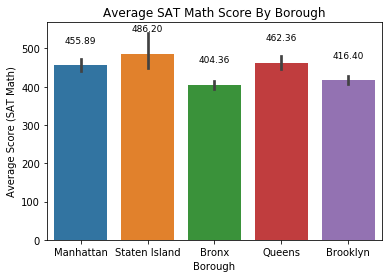

In [192]:
#We can plot without needing to use the above table
ax1 = sns.barplot(x='Borough', y= 'Average Score (SAT Math)', data= df)
ax1.set_title('Average SAT Math Score By Borough')
#annotate in values, taken from https://stackoverflow.com/questions/45946970/displaying-of-values-on-barchart
#fontsize and text coordinates have been edited throughout to better fit these graphs
for p in ax1.patches:
             ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=9, color='black', xytext=(0, 25),
                 textcoords='offset points')


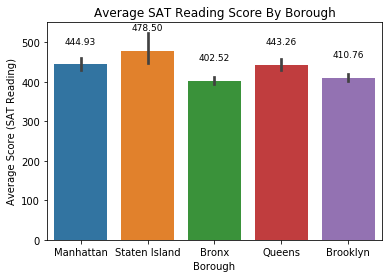

In [99]:
ax2 = sns.barplot(x='Borough', y= 'Average Score (SAT Reading)', data= df)
ax2.set_title('Average SAT Reading Score By Borough')
for p in ax2.patches:
             ax2.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=9, color='black', xytext=(0, 23),
                 textcoords='offset points')

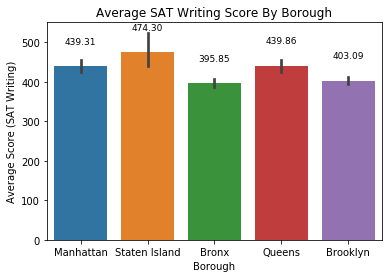

In [95]:
ax3 = sns.barplot(x='Borough', y= 'Average Score (SAT Writing)', data= df)
ax3.set_title('Average SAT Writing Score By Borough')
for p in ax3.patches:
             ax3.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=9, color='black', xytext=(0, 25),
                 textcoords='offset points')

Each plot makes sense on their own, but it would be helpful to see each section side by side. We need to use Pandas' melt function in order to do so.

In [122]:
#Melt dataframe so that we can see the three sections on one plot
df2= df[['Borough', 'Average Score (SAT Math)','Average Score (SAT Reading)', 'Average Score (SAT Writing)']]
melted = pd.melt(df2, id_vars = "Borough", var_name= "Section", value_name="Scores")
melted

,Borough,Section,Scores
0,Manhattan,Average Score (SAT Math),NaN
1,Manhattan,Average Score (SAT Math),NaN
2,Manhattan,Average Score (SAT Math),657.0
3,Manhattan,Average Score (SAT Math),395.0
4,Manhattan,Average Score (SAT Math),418.0
...,...,...,...
1300,Queens,Average Score (SAT Writing),352.0
1301,Queens,Average Score (SAT Writing),376.0
1302,Queens,Average Score (SAT Writing),423.0
1303,Queens,Average Score (SAT Writing),405.0


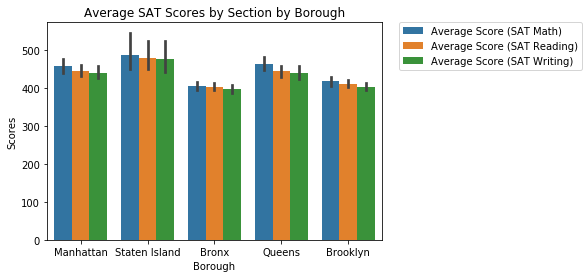

In [33]:
ax4 = sns.barplot(x="Borough", y="Scores",hue="Section", data=melted)
ax4.set_title("Average SAT Scores by Section by Borough")
ax4.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

With earlier plots, it was nice to have the values of each bar for a quick numerical comparison. Using the same function from earlier to plot the values onto the graph creates a cramped figure. Let's just bring back the table of aggregate data from earlier and look at them together.

In [35]:
agg_stats

Average Score (SAT Math)                     \
                                   min    max        mean   
Borough                                                     
Bronx                            317.0  714.0  404.357143   
Brooklyn                         319.0  682.0  416.403670   
Manhattan                        344.0  754.0  455.887640   
Queens                           340.0  701.0  462.362319   
Staten Island                    420.0  711.0  486.200000   

              Average Score (SAT Reading)                     \
                                      min    max        mean   
Borough                                                        
Bronx                               311.0  672.0  402.520408   
Brooklyn                            302.0  608.0  410.761468   
Manhattan                           330.0  697.0  444.932584   
Queens                              320.0  640.0  443.260870   
Staten Island                       427.0  660.0  478.500000   

              Average Score (SAT Writing)                     
                                      min    max        mean  
Borough                                                       
Bronx                               292.0  672.0  395.846939  
Brooklyn                            284.0  606.0  403.091743  
Manhattan                           316.0  693.0  439.314607  
Queens                              318.0  661.0  439.855072  
Staten Island                       409.0  670.0  474.300000

...Or, how about we just sum up the bars and look at the cumulative scores?

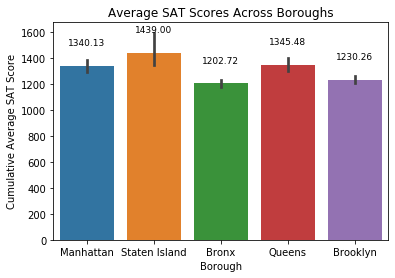

In [194]:
#Create Cumulative Score Column
df['Cumulative Average SAT Score'] = df['Average Score (SAT Math)'] + df['Average Score (SAT Reading)'] + df['Average Score (SAT Writing)']

ax5 = sns.barplot(x="Borough", y= "Cumulative Average SAT Score", data=df)
ax5.set_title("Average SAT Scores Across Boroughs")
for p in ax5.patches:
             ax5.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=9, color='black', xytext=(0,23),
                 textcoords='offset points')

Text(0.5, 1.0, 'SAT Score Distribution Across Boroughs')

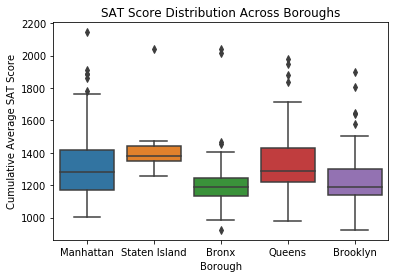

In [208]:
#Let's see how the distributions vary between the boroughs, and effects of outliers
box = sns.boxplot(x="Borough", y= "Cumulative Average SAT Score", data=df)
box.set_title("SAT Score Distribution Across Boroughs")

Let's see if there's statistical significance in the SAT scores across the boroughs. There's 5 populations of unequal size, so a one-way ANOVA is appropriate here.

In [186]:
#create new dataframe, focusing just on boroughs and cume scores
df3 = df[['Borough','Cumulative Average SAT Score']]
#I tried a lot of different things, and while googling the simplest way to do this I happened to come across a page using the same dataset: 
#https://codingdisciple.com/hypothesis-testing-ANOVA-python.html

#create a dictionary and fill in values with a function. Thanks, codingdisciple.
boroughs = ['Manhattan', 'Staten Island', 'Bronx', 'Queens', 'Brooklyn']
scores = {}

for i in boroughs:
    scores[i] = df3[df3['Borough'] == i]['Cumulative Average SAT Score']    

sp.stats.f_oneway(scores['Manhattan'],scores['Staten Island'],scores['Bronx'],scores['Queens'],scores['Brooklyn'])

F_onewayResult(statistic=12.73308502920167, pvalue=1.0161974965566023e-09)

That's quite a small p-value- clearly <.05, so we reject the null hypothesis and conclude statistical significance.

## 4. Digging deeper

Our data includes demographic info- let's see if there's disparities in SAT scores between demographics.

In [195]:
#Percentages have been brought in as strings instead of floats
#Convert string to float values, add column delineating if a school is Majority White
df['Percent White'] = df['Percent White'].str.rstrip('%').astype('float')
df['Percent Black'] = df['Percent Black'].str.rstrip('%').astype('float')
df['Percent Hispanic'] = df['Percent Hispanic'].str.rstrip('%').astype('float')
df['Percent Asian'] = df['Percent Asian'].str.rstrip('%').astype('float')
df['Majority White?'] = df['Percent White'].apply(lambda x: 'Y' if x>=50.00 else 'N')
df

AttributeError: Can only use .str accessor with string values!

In [53]:
df['Majority White?'].value_counts()

N    423
Y     12
Name: Majority White?, dtype: int64

Looks like there aren't many schools where White students are actually >50% of the population. A better way to measure discrepancies would be to further separate the schools based on pluralities, where White students might make up the largest number of students but don't cross into the majority.

For the sake of this demonstration, we won't go into that- let's instead plot based on Majority-White and Non-Majority White.

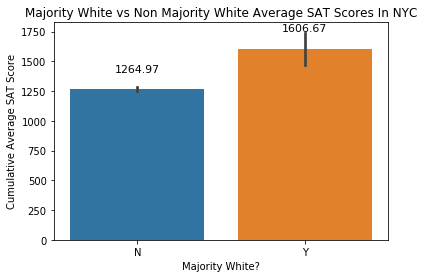

In [197]:
#df['Cumulative Average SAT Score'] = df['Average Score (SAT Math)'] + df['Average Score (SAT Reading)'] + df['Average Score (SAT Writing)']
ax6 = sns.barplot(x= 'Majority White?', y= 'Cumulative Average SAT Score', data= df)
ax6.set_title("Majority White vs Non Majority White Average SAT Scores In NYC")
for p in ax6.patches:
             ax6.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                 textcoords='offset points')

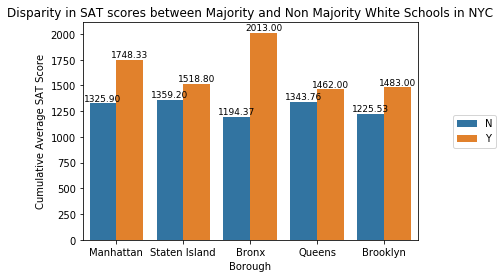

In [198]:
#Plot between boroughs, remove error bars so text is clean
ax7 = sns.barplot(x= 'Borough', y='Cumulative Average SAT Score', hue= 'Majority White?', data=df, ci= None)
ax7.set_title("Disparity in SAT scores between Majority and Non Majority White Schools in NYC")
ax7.legend(loc='right', bbox_to_anchor=(1.25, 0.5), ncol=1)
for p in ax7.patches:
             ax7.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                 textcoords='offset points')

From a storytelling perspective, the above graph can be used to paint a powerful narrative of demographic inequality in the city. However, we know from above that the sample sizes of Majority-White schools is actually very small. Let's look at Manhattan for example.

In [86]:
#Select for Manhattan, create two variables based on N/Y status
Manhattan_Non_White = df.loc[(df['Borough'] == 'Manhattan') & (df['Majority White?'] == 'N')]
Manhattan_White = df.loc[(df['Borough'] == 'Manhattan') & (df['Majority White?'] == 'Y')]

Manhattan_Non_White_Scores = Manhattan_Non_White['Cumulative Average SAT Score']
Manhattan_White_Scores = Manhattan_White['Cumulative Average SAT Score']
print(len(Manhattan_Non_White_Scores))
print(len(Manhattan_White_Scores))

103
3


With 3 "Majority White" schools in Manhattan and 103 "Non-Majority White", statistical tests for significance are meaningless.

In [202]:
sp.stats.f_oneway(Manhattan_Non_White_Scores,Manhattan_White_Scores)

F_onewayResult(statistic=nan, pvalue=nan)

## 5. Playing around

There's clearly a ton more that we can do with this data in terms of statistical analysis between the districts. This project is just to show core competencies in data manipulation though, so we'll conclude the notebook by playing around with some other cool visualization tools in python.

### Mapping scores based on Zipcodes

Our dataframe has the zipcodes for each school- it would be interesting to see how scores vary on a map. The folium library can be used to visualize data on maps. Instructions were taken from Saidakbar P on Kaggle, where they visualized NYC Apartment Sales Data: https://www.kaggle.com/saidakbarp/nyc-property-sales-eda-map-analysis/data#Map-analysis

In [219]:
! pip install folium
import folium

In [217]:
#Create zipcodes dataframe
zipcodes= df[['Borough','Zip Code','Cumulative Average SAT Score']]
zipcodes.info()
zipcodes.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 375 entries, 2 to 434
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Borough                       375 non-null    object 
 1   Zip Code                      375 non-null    int64  
 2   Cumulative Average SAT Score  375 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 21.7+ KB


,Borough,Zip Code,Cumulative Average SAT Score
2,Manhattan,10002,1859.0
3,Manhattan,10002,1193.0
4,Manhattan,10002,1261.0
5,Manhattan,10002,1529.0
6,Manhattan,10002,1197.0


In [244]:
#Set zip code column as String from int
zipcodes['Zip Code']= zipcodes['Zip Code'].astype(str)

C:\Users\si2320\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [245]:
zipcodes_mean = zipcodes.groupby(zipcodes['Zip Code'], as_index= False).agg(np.mean) #calculate mean SAT score for each zip
zipcodes_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 0 to 114
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Zip Code                      115 non-null    object 
 1   Cumulative Average SAT Score  115 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.7+ KB


In [255]:
#map function from Folium
map = folium.Map(location=[40.693943, -73.985880], default_zoom_start=12)
map.choropleth(geo_data="NYC Zip Code.geojson", # I found this NYC zipcode boundaries by googling 
             data=zipcodes_mean, # dataset for zips and scores
             columns=['Zip Code', 'Cumulative Average SAT Score'], # first is zip code column for matching with geojson, second column for scores
             key_on='feature.properties.postalCode', # this path contains zipcodes in str type, this zipcodes should match with our ZIP CODE column
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.3,
             legend_name='Cumulative Average SAT Score')
map

C:\Users\si2320\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


The dark black patches indicate missing scores- either these zips dont have schools, or something is wrong with our data. Let's check- I'm immediately drawn to the area around Columbia, where the zip code right below Morningside Heights is dark. Are there no schools there? Google Maps lets me know that the zip for this area is 10025.

In [248]:
df['Zip Code'].unique()

array([10002, 10003, 10004, 10006, 10009, 10010, 10011, 10013, 10016,
       10019, 10021, 10023, 10024, 10026, 10027, 10029, 10030, 10031,
       10032, 10033, 10035, 10036, 10038, 10039, 10040, 10065, 10128,
       10282, 10301, 10302, 10306, 10312, 10314, 10451, 10453, 10454,
       10455, 10456, 10457, 10458, 10459, 10460, 10461, 10462, 10463,
       10466, 10467, 10468, 10469, 10472, 10473, 10475, 11101, 11102,
       11103, 11106, 11201, 11203, 11204, 11205, 11206, 11207, 11208,
       11209, 11210, 11211, 11212, 11213, 11214, 11215, 11216, 11217,
       11218, 11220, 11221, 11222, 11223, 11224, 11225, 11226, 11229,
       11230, 11231, 11232, 11233, 11235, 11236, 11237, 11238, 11354,
       11355, 11358, 11361, 11364, 11365, 11366, 11367, 11368, 11373,
       11375, 11385, 11411, 11412, 11413, 11416, 11417, 11418, 11423,
       11426, 11427, 11432, 11433, 11434, 11691, 11694], dtype=int64)

And...yeah, 10025 is missing. Our map has an interesting size effect of letting us know that large portions of city don't have public high schools! Given how connected the city is via public transit, this isn't generally a problem. But do transit deserts have high schools near them? Let's overlap the nyc subway system onto our map.

In [257]:
#add another GeoJson layer. Taken from the folium documentation: https://python-visualization.github.io/folium/quickstart.html
subway = f'Subway Stations.geojson'
folium.GeoJson(
    subway,
    name='Subway System'
).add_to(map)
folium.LayerControl().add_to(map) #Layer toggle so that the markers can be hidden

map

It's messy, but as you zoom in you can start to see the system unfold. In many cases, if you live in a zip code without a high school, you still have access to the subway. NYC's school system is complex, and many students do not attend their zoned high school anyway.

Eastern Bronx and Northeastern Queens are noticeable in terms of being both a transit desert and not having a local high school, however.